In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states 
import gmaps
import seaborn as sns

In [2]:
api_key = "1383ed6d1c178075bb6c33d544f4a17d700c9607"

In [3]:
c = Census(api_key, year=2016)

In [4]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})


# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,01,Alabama,4841164.0,38.6,44758.0,24736.0,868666.0,17.943329,3.810633
1,02,Alaska,736855.0,33.6,74444.0,34191.0,72826.0,9.883356,4.090221
2,04,Arizona,6728577.0,37.1,51340.0,26686.0,1165636.0,17.323663,3.715080
3,05,Arkansas,2968472.0,37.7,42336.0,23401.0,542431.0,18.273071,3.139326
4,06,California,38654206.0,36.0,63783.0,31458.0,6004257.0,15.533257,4.355868
5,08,Colorado,5359295.0,36.4,62520.0,33230.0,637938.0,11.903394,3.203686
6,09,Connecticut,3588570.0,40.6,71755.0,39906.0,360464.0,10.044781,4.319409
7,10,Delaware,934695.0,39.6,61017.0,31118.0,109448.0,11.709488,3.602138
8,11,District of Columbia,659009.0,33.8,72935.0,48781.0,112060.0,17.004320,5.056987
9,12,Florida,19934451.0,41.6,48900.0,27598.0,3139258.0,15.747903,4.023266


In [5]:
gr_population = census_pd.groupby('State')
gr_population["Population"]


In [6]:
state_table = pd.read_csv("csv_data/state_abbreviations.csv")
state_table

,CAPS,Name,State
0,ALABAMA,Alabama,AL
1,ALASKA,Alaska,AK
2,ARIZONA,Arizona,AZ
3,ARKANSAS,Arkansas,AR
4,CALIFORNIA,California,CA
5,COLORADO,Colorado,CO
6,CONNECTICUT,Connecticut,CT
7,DELAWARE,Delaware,DE
8,FLORIDA,Florida,FL
9,GEORGIA,Georgia,GA


In [7]:
merge_table = pd.merge(census_pd, state_table, on="Name", how="inner")
merge_table

,State_x,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,CAPS,State_y
0,01,Alabama,4841164.0,38.6,44758.0,24736.0,868666.0,17.943329,3.810633,ALABAMA,AL
1,02,Alaska,736855.0,33.6,74444.0,34191.0,72826.0,9.883356,4.090221,ALASKA,AK
2,04,Arizona,6728577.0,37.1,51340.0,26686.0,1165636.0,17.323663,3.715080,ARIZONA,AZ
3,05,Arkansas,2968472.0,37.7,42336.0,23401.0,542431.0,18.273071,3.139326,ARKANSAS,AR
4,06,California,38654206.0,36.0,63783.0,31458.0,6004257.0,15.533257,4.355868,CALIFORNIA,CA
5,08,Colorado,5359295.0,36.4,62520.0,33230.0,637938.0,11.903394,3.203686,COLORADO,CO
6,09,Connecticut,3588570.0,40.6,71755.0,39906.0,360464.0,10.044781,4.319409,CONNECTICUT,CT
7,10,Delaware,934695.0,39.6,61017.0,31118.0,109448.0,11.709488,3.602138,DELAWARE,DE
8,12,Florida,19934451.0,41.6,48900.0,27598.0,3139258.0,15.747903,4.023266,FLORIDA,FL
9,13,Georgia,10099320.0,36.2,51037.0,26678.0,1746894.0,17.297145,4.149913,GEORGIA,GA


In [8]:
newtable_df = merge_table.rename(columns={"State_x": "Index", "Name": "Name", "Population": "Population",
                                      "Median Age": "MedianAge", "Household Income": "HouseholdIncome", "Per Capita Income": "BPerCapitaIncome",
                                         "Poverty Count": "PovertyCount", "Unemployment Rate": "UnemploymentRate", "CAPS":"CAPS", "State_y":"State"})

newtable_df

,Index,Name,Population,MedianAge,HouseholdIncome,BPerCapitaIncome,PovertyCount,Poverty Rate,UnemploymentRate,CAPS,State
0,01,Alabama,4841164.0,38.6,44758.0,24736.0,868666.0,17.943329,3.810633,ALABAMA,AL
1,02,Alaska,736855.0,33.6,74444.0,34191.0,72826.0,9.883356,4.090221,ALASKA,AK
2,04,Arizona,6728577.0,37.1,51340.0,26686.0,1165636.0,17.323663,3.715080,ARIZONA,AZ
3,05,Arkansas,2968472.0,37.7,42336.0,23401.0,542431.0,18.273071,3.139326,ARKANSAS,AR
4,06,California,38654206.0,36.0,63783.0,31458.0,6004257.0,15.533257,4.355868,CALIFORNIA,CA
5,08,Colorado,5359295.0,36.4,62520.0,33230.0,637938.0,11.903394,3.203686,COLORADO,CO
6,09,Connecticut,3588570.0,40.6,71755.0,39906.0,360464.0,10.044781,4.319409,CONNECTICUT,CT
7,10,Delaware,934695.0,39.6,61017.0,31118.0,109448.0,11.709488,3.602138,DELAWARE,DE
8,12,Florida,19934451.0,41.6,48900.0,27598.0,3139258.0,15.747903,4.023266,FLORIDA,FL
9,13,Georgia,10099320.0,36.2,51037.0,26678.0,1746894.0,17.297145,4.149913,GEORGIA,GA


In [9]:
hospitalgen = pd.read_csv("csv_data/Hospital General Information.csv")
hospitalgen.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Hospital Type,Hospital Ownership,Emergency Services
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Acute Care Hospitals,Government - Hospital District or Authority,Yes
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Acute Care Hospitals,Government - Hospital District or Authority,Yes
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,Acute Care Hospitals,Government - Hospital District or Authority,Yes
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,Acute Care Hospitals,Voluntary non-profit - Private,Yes
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,Acute Care Hospitals,Proprietary,Yes


In [10]:
hospitalstr = pd.read_csv("csv_data/Structural Measures - Hospital.csv")
hospitalstr.head()


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Measure Name,Measure ID,Measure Response
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,Able to receive lab results electronically,OP_12,Yes
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,"Able to track patients' lab results, tests, an...",OP_17,No
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,Able to receive lab results electronically,OP_12,Yes
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,"Able to track patients' lab results, tests, an...",OP_17,Yes
4,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,Able to receive lab results electronically,OP_12,Yes


In [11]:
hospitaldetail = pd.read_csv("csv_data/HCAHPS - Hospital.csv")
hospitaldetail.head()



,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW


In [12]:
count = hospitaldetail["Hospital Name"].count()
count

4744

In [13]:
len(set(zip(hospitaldetail['State'],hospitaldetail['Hospital Name'])))

4744

In [14]:
state_counts = hospitaldetail["State"].value_counts()
state_counts.head()

TX    396
CA    345
FL    187
NY    174
IL    174
Name: State, dtype: int64

In [15]:
grouped_df = hospitaldetail.groupby('State',as_index =False)
count_df = grouped_df["Hospital Name"].count()
count_df





,State,Hospital Name
0,AK,22
1,AL,94
2,AR,77
3,AS,1
4,AZ,80
5,CA,345
6,CO,82
7,CT,32
8,DC,8
9,DE,8


In [16]:
hospital_count_df = count_df.rename(columns={"State": "State", "Hospital Name": "Count"})
hospital_count_df


,State,Count
0,AK,22
1,AL,94
2,AR,77
3,AS,1
4,AZ,80
5,CA,345
6,CO,82
7,CT,32
8,DC,8
9,DE,8


In [17]:
hospital_table = pd.merge(newtable_df, hospital_count_df, on="State", how="outer")
hospital_table

,Index,Name,Population,MedianAge,HouseholdIncome,BPerCapitaIncome,PovertyCount,Poverty Rate,UnemploymentRate,CAPS,State,Count
0,01,Alabama,4841164.0,38.6,44758.0,24736.0,868666.0,17.943329,3.810633,ALABAMA,AL,94
1,02,Alaska,736855.0,33.6,74444.0,34191.0,72826.0,9.883356,4.090221,ALASKA,AK,22
2,04,Arizona,6728577.0,37.1,51340.0,26686.0,1165636.0,17.323663,3.715080,ARIZONA,AZ,80
3,05,Arkansas,2968472.0,37.7,42336.0,23401.0,542431.0,18.273071,3.139326,ARKANSAS,AR,77
4,06,California,38654206.0,36.0,63783.0,31458.0,6004257.0,15.533257,4.355868,CALIFORNIA,CA,345
5,08,Colorado,5359295.0,36.4,62520.0,33230.0,637938.0,11.903394,3.203686,COLORADO,CO,82
6,09,Connecticut,3588570.0,40.6,71755.0,39906.0,360464.0,10.044781,4.319409,CONNECTICUT,CT,32
7,10,Delaware,934695.0,39.6,61017.0,31118.0,109448.0,11.709488,3.602138,DELAWARE,DE,8
8,12,Florida,19934451.0,41.6,48900.0,27598.0,3139258.0,15.747903,4.023266,FLORIDA,FL,187
9,13,Georgia,10099320.0,36.2,51037.0,26678.0,1746894.0,17.297145,4.149913,GEORGIA,GA,130


In [18]:
#emergency_df = hospitalgen.groupby('State',as_index =False)
#emcount_df = emergency_df["Emergency Services"].count()
#emcount_df
hospitalgen.groupby('State')['Emergency Services'].value_counts().unstack(1)
#hospitalgen.loc[(hospitalgen['Emergency Services']== 'No') & (hospitalgen['State']== 'AR')]

#df.groupby('').apply(lambda g: g['PlayTennis'].value_counts())

Emergency Services,No,Yes
State,,
AK,1.0,21.0
AL,2.0,89.0
AR,NaN,75.0
AS,NaN,1.0
AZ,15.0,63.0
CA,78.0,263.0
CO,2.0,78.0
CT,3.0,28.0
DC,NaN,8.0


In [19]:
hospitalstr.groupby('State')['Measure Response'].value_counts().unstack(1)
#hospitalstr["Measure Response"].value_counts()


Measure Response,No,Not Available,Yes
State,,,
AK,NaN,28.0,16.0
AL,27.0,12.0,143.0
AR,17.0,42.0,91.0
AS,NaN,2.0,NaN
AZ,18.0,42.0,96.0
CA,63.0,140.0,479.0
CO,3.0,62.0,95.0
CT,6.0,4.0,52.0
DC,NaN,2.0,14.0


Text(0.5,0,'Population')

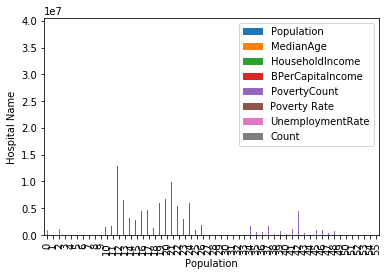

In [20]:

count_chart = hospital_table.plot(kind='bar')
count_chart.set_ylabel("Hospital Name")
count_chart.set_xlabel("Population")

([<matplotlib.axis.XTick at 0x1a160367b8>,
 <a list of 56 Text xticklabel objects>)

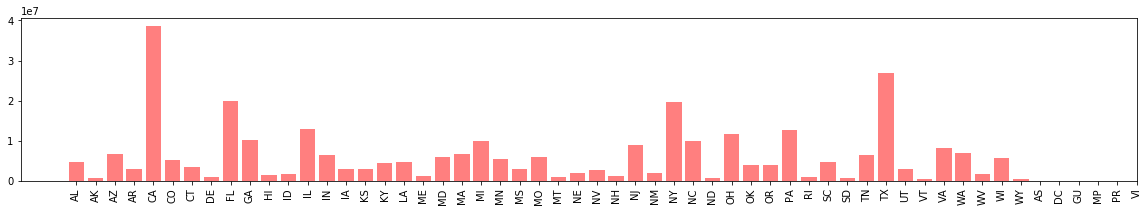

In [21]:
x_axis = np.arange(len(hospital_table))
plt.figure(figsize=(20,3))
plt.bar(x_axis, hospital_table["Population"], color='r', alpha=0.5, align="center")
plt.xticks(x_axis, hospital_table["State"], rotation="vertical")

([<matplotlib.axis.XTick at 0x1a1a4399b0>,
 <a list of 56 Text xticklabel objects>)

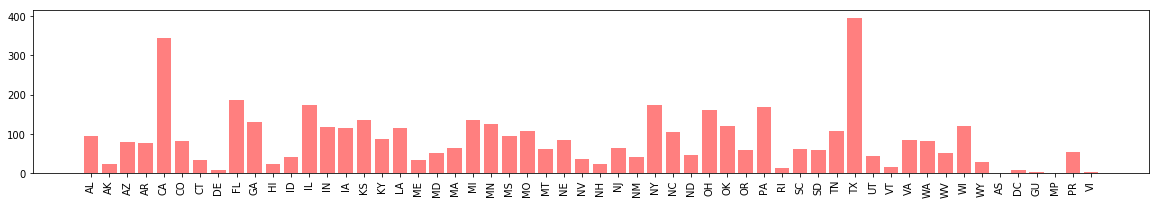

In [22]:
x_axis = np.arange(len(hospital_table))
plt.figure(figsize=(20,3))
plt.bar(x_axis, hospital_table["Count"], color='r', alpha=0.5, align="center")
plt.xticks(x_axis, hospital_table["State"], rotation="vertical")

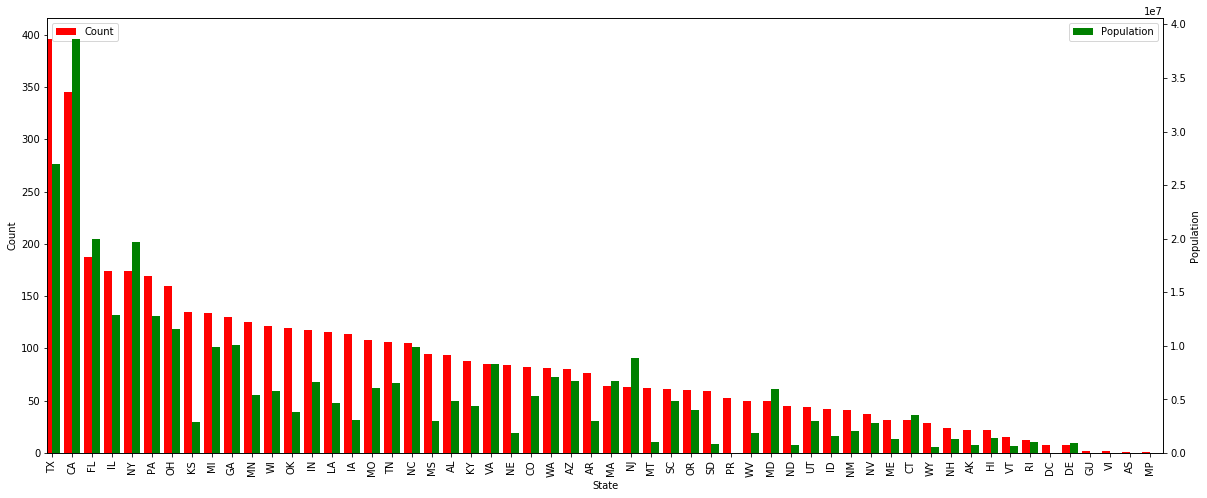

In [43]:
fig = plt.figure(figsize = (20,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
hospital_table.sort_values(by="Count", inplace=True, ascending = False) 
hospital_table.reset_index(drop=True, inplace=True)
hospital_table.Count.plot(kind='bar', color='red', ax=ax, width=width, position=1)
hospital_table.Population.plot(kind='bar', color='green', ax=ax2, width=width, position=0)


ax.set_ylabel('Count')
ax2.set_ylabel('Population')
ax.set_xlabel('State')
ax.set_xticks(hospital_table.index)
ax.set_xticklabels(hospital_table.State)
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.savefig("savedimages/barchart.png")
plt.show()


In [24]:
#y = range(50)
#x1 = range(20)
#x2 = range(0, 20000, 10)

#fig, axes = plt.subplots(ncols=2, sharey=True)
#axes[0].barh(State, Count, align='center', color='gray')
#axes[1].barh(State, Population, align='center', color='gray')
#axes[0].invert_xaxis()
#plt.show()

In [25]:
state_abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA",
         "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
         "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
         "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
         "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [26]:
new_hospital_table = hospital_table[hospital_table.State.isin(state_abb)]
new_hospital_table

,Index,Name,Population,MedianAge,HouseholdIncome,BPerCapitaIncome,PovertyCount,Poverty Rate,UnemploymentRate,CAPS,State,Count
0,48,Texas,26956435.0,34.2,54727.0,27828.0,4397307.0,16.312643,3.146303,TEXAS,TX,396
1,06,California,38654206.0,36.0,63783.0,31458.0,6004257.0,15.533257,4.355868,CALIFORNIA,CA,345
2,12,Florida,19934451.0,41.6,48900.0,27598.0,3139258.0,15.747903,4.023266,FLORIDA,FL,187
3,17,Illinois,12851684.0,37.4,59196.0,31502.0,1753731.0,13.645924,4.245630,ILLINOIS,IL,174
4,36,New York,19697457.0,38.2,60741.0,34212.0,2967564.0,15.065721,3.854426,NEW YORK,NY,174
5,42,Pennsylvania,12783977.0,40.6,54895.0,30137.0,1647762.0,12.889275,3.664274,PENNSYLVANIA,PA,169
6,39,Ohio,11586941.0,39.3,50674.0,27800.0,1732839.0,14.955103,3.658912,OHIO,OH,160
7,20,Kansas,2898292.0,36.2,53571.0,28478.0,373162.0,12.875238,2.725743,KANSAS,KS,135
8,26,Michigan,9909600.0,39.5,50803.0,27549.0,1575066.0,15.894345,4.167010,MICHIGAN,MI,134
9,13,Georgia,10099320.0,36.2,51037.0,26678.0,1746894.0,17.297145,4.149913,GEORGIA,GA,130


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


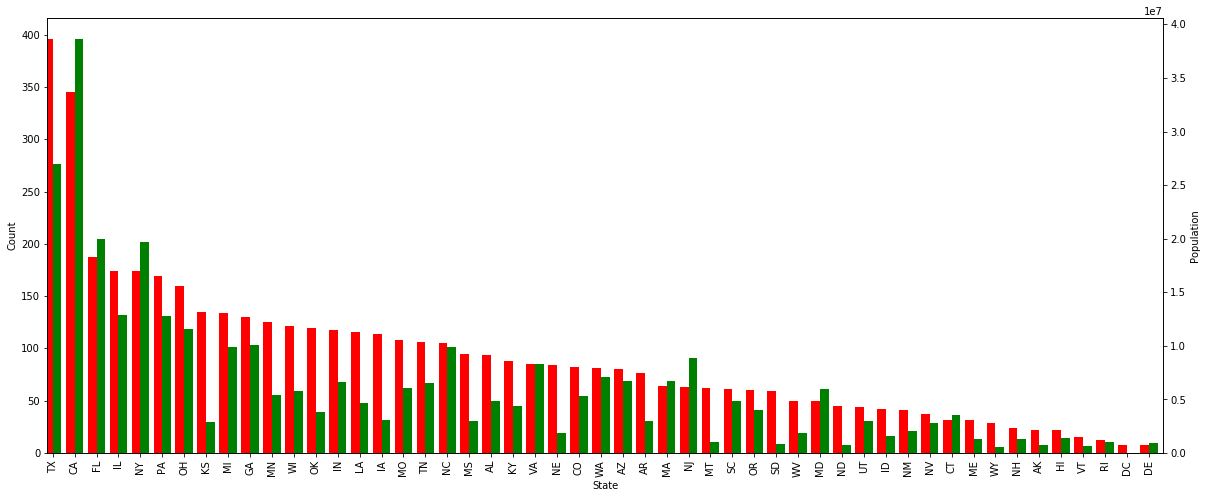

In [27]:
fig = plt.figure(figsize = (20,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
new_hospital_table.sort_values(by="Count", inplace=True, ascending = False) 
new_hospital_table.reset_index(drop=True, inplace=True)
new_hospital_table.Count.plot(kind='bar', color='red', ax=ax, width=width, position=1)
new_hospital_table.Population.plot(kind='bar', color='green', ax=ax2, width=width, position=0)

ax.set_ylabel('Count')
ax2.set_ylabel('Population')
ax.set_xlabel('State')
ax.set_xticks(new_hospital_table.index)
ax.set_xticklabels(new_hospital_table.State)

plt.show()

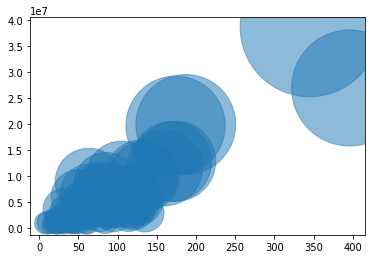

In [28]:
plt.scatter(new_hospital_table['Count'], new_hospital_table['Population'], s=new_hospital_table['Population']/2000, alpha=.5)

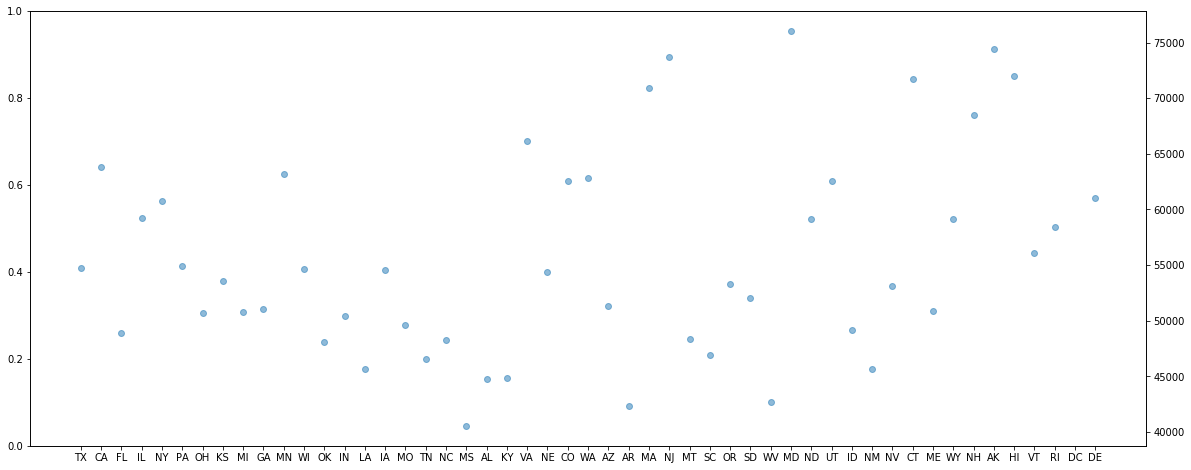

In [29]:
fig = plt.figure(figsize = (20,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
plt.scatter(new_hospital_table['State'], new_hospital_table['HouseholdIncome'], alpha=.5)
plt.savefig("savedimages/scatterstateincome.png")
plt.show()

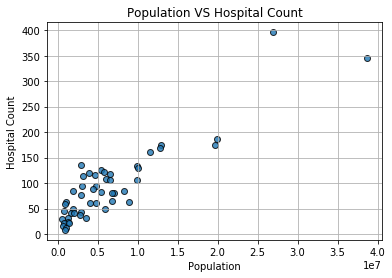

In [30]:
#Scatter Plot using Population vs Hospital Count
plt.scatter(new_hospital_table['Population'], new_hospital_table['Count'],edgecolor="black", linewidth=1,marker="o",alpha=0.8,label="data")
plt.title("Population VS Hospital Count")
plt.xlabel("Population")
plt.ylabel("Hospital Count")

plt.grid(True)
plt.savefig("savedimages/scatterpopulation.png")
plt.show()

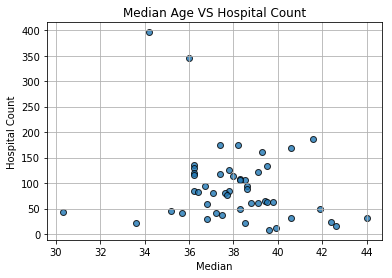

In [31]:
#Scatter Plot using Median Age vs Hospital Count
plt.scatter(new_hospital_table['MedianAge'], new_hospital_table['Count'],edgecolor="black", linewidth=1,marker="o",alpha=0.8,label="data")
plt.title("Median Age VS Hospital Count")
plt.xlabel("Median")
plt.ylabel("Hospital Count")
plt.grid(True)
plt.savefig("savedimages/scattermedianage.png")
plt.show()

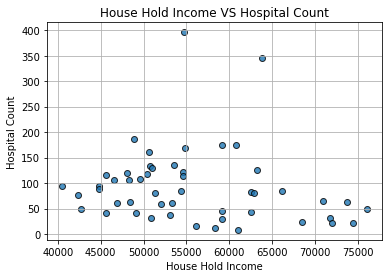

In [32]:
#Scatter Plot using House Hold Income vs Hospital Count
plt.scatter(new_hospital_table['HouseholdIncome'], new_hospital_table['Count'],edgecolor="black", linewidth=1,marker="o",alpha=0.8,label="data")
plt.title("House Hold Income VS Hospital Count")
plt.xlabel("House Hold Income")
plt.ylabel("Hospital Count")
plt.grid(True)
plt.savefig("savedimages/scatterIncome.png")
plt.show()
 



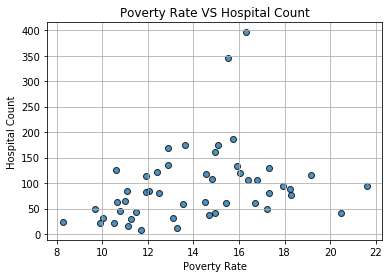

In [33]:
#Scatter Plot using House Hold Income vs Hospital Count
plt.scatter(new_hospital_table['Poverty Rate'], new_hospital_table['Count'],edgecolor="black", linewidth=1,marker="o",alpha=0.8,label="data")
plt.title("Poverty Rate VS Hospital Count")
plt.xlabel("Poverty Rate")
plt.ylabel("Hospital Count")
plt.grid(True)
plt.savefig("savedimages/scatterPoverty.png")
plt.show()
 

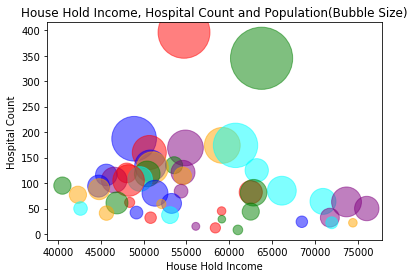

In [34]:
plt.scatter(x=new_hospital_table["HouseholdIncome"],
            y=new_hospital_table["Count"],
            s=new_hospital_table["Population"]/10000,
            alpha =0.5,
            c=["red", "green", "blue", "orange","cyan","purple"])

plt.title("House Hold Income, Hospital Count and Population(Bubble Size)")
plt.xlabel("House Hold Income")
plt.ylabel("Hospital Count")
plt.savefig("savedimages/Bubble.png")

Text(0,0.5,'Hospital Count')

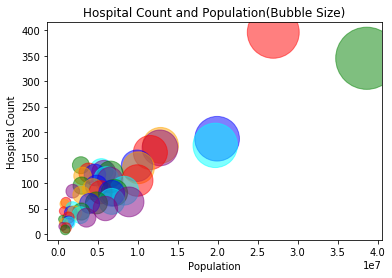

In [35]:
plt.scatter(x=new_hospital_table["Population"],
            y=new_hospital_table["Count"],
            s=new_hospital_table["Population"]/10000,
            alpha =0.5,
            c=["red", "green", "blue", "orange","cyan","purple"])

plt.title("Hospital Count and Population(Bubble Size)")
plt.xlabel("Population")
plt.ylabel("Hospital Count")

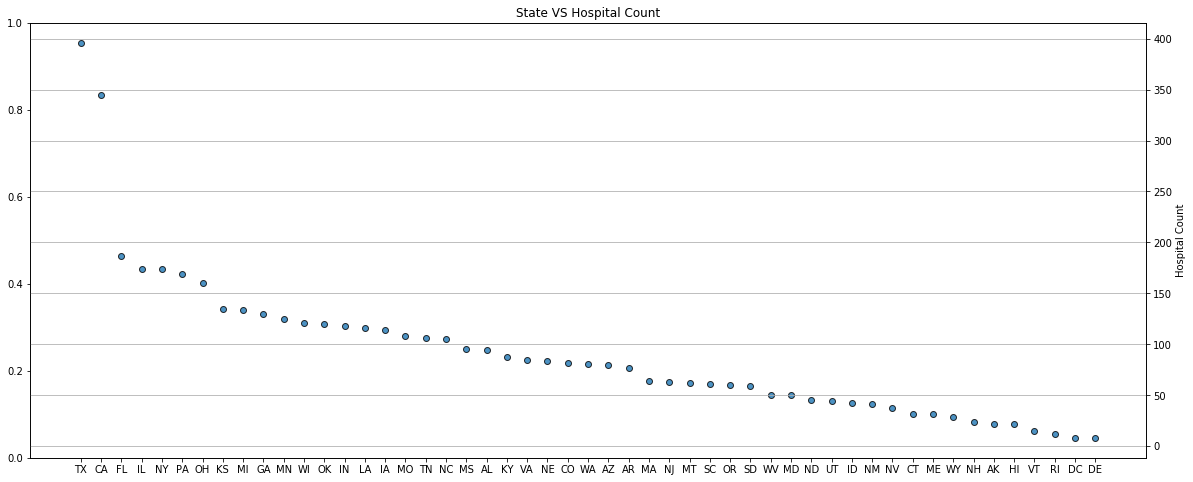

In [36]:
#Scatter Plot using Median Age vs Hospital Count
fig = plt.figure(figsize = (20,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

plt.scatter(new_hospital_table['State'], new_hospital_table['Count'],edgecolor="black", linewidth=1,marker="o",alpha=0.8,label="data")
plt.title("State VS Hospital Count")
plt.xlabel("State")
plt.ylabel("Hospital Count")
plt.grid(True)
plt.savefig("savedimages/scatterStateHospitalCount.png")
plt.show()